# Bike Sharing Case Study

# Step 1: Reading and Understanding the Data

## Importing the libraries and Reading the Bike sharing dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
Bikes_sharing = pd.read_csv('day.csv')
Bikes_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Inspecting the Dataset

In [3]:
Bikes_sharing.shape

(730, 16)

In [4]:
Bikes_sharing.info

<bound method DataFrame.info of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspee

In [5]:
Bikes_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
Bikes_sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
Bikes_sharing.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

# Inferences:
## In the Bike Prediction dataset there are a total of 730 rows and 16 columns in which we need to use the 'CNT' column for the prediction purpose.

# Data Cleaning

In [8]:
# Dropping 'instant' column as it is index column not needed to evaluate the target
Bikes_sharing.drop(['instant'], axis = 1, inplace = True)

# Dropping 'dteday' column as we have already month and weekday columns for date understanding
Bikes_sharing.drop(['dteday'], axis = 1, inplace = True)

# Dropping 'casual' and 'registered' columns as cnt column ie target is the sum of the both these columns
Bikes_sharing.drop(['casual'], axis = 1, inplace = True)
Bikes_sharing.drop(['registered'], axis = 1, inplace = True)

In [9]:
Bikes_sharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [10]:
# verify the  null values
Bikes_sharing.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [11]:
# check the number of unique values in all the columns
Bikes_sharing.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [12]:
# Encoding the season column
Bikes_sharing.season = Bikes_sharing.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})


In [13]:
# Encoding the month column
Bikes_sharing.mnth = Bikes_sharing.mnth.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})



In [14]:
# Encoding the weekday column
Bikes_sharing.weekday = Bikes_sharing.weekday.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})


In [15]:
# Encoding the weather sit column
Bikes_sharing.weathersit = Bikes_sharing.weathersit.map({1:'Clear',2:'Mist',3:'Light snow',4:'Heavy rain'})

In [16]:
Bikes_sharing.info

<bound method DataFrame.info of      season  yr      mnth  holiday weekday  workingday weathersit       temp  \
0    Spring   0   January        0     Mon           0       Mist  14.110847   
1    Spring   0   January        0    Tues           0       Mist  14.902598   
2    Spring   0   January        0     Wed           1      Clear   8.050924   
3    Spring   0   January        0   Thurs           1      Clear   8.200000   
4    Spring   0   January        0     Fri           1      Clear   9.305237   
..      ...  ..       ...      ...     ...         ...        ...        ...   
725  Spring   1  December        0     Sat           1       Mist  10.420847   
726  Spring   1  December        0     Sun           1       Mist  10.386653   
727  Spring   1  December        0     Mon           0       Mist  10.386653   
728  Spring   1  December        0    Tues           0      Clear  10.489153   
729  Spring   1  December        0     Wed           1       Mist   8.849153   

       

In [17]:
Bikes_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Mon,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Tues,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
Bikes_sharing.shape

(730, 12)

In [19]:
# Step 2: Data Visualization i.e. Visualising the data

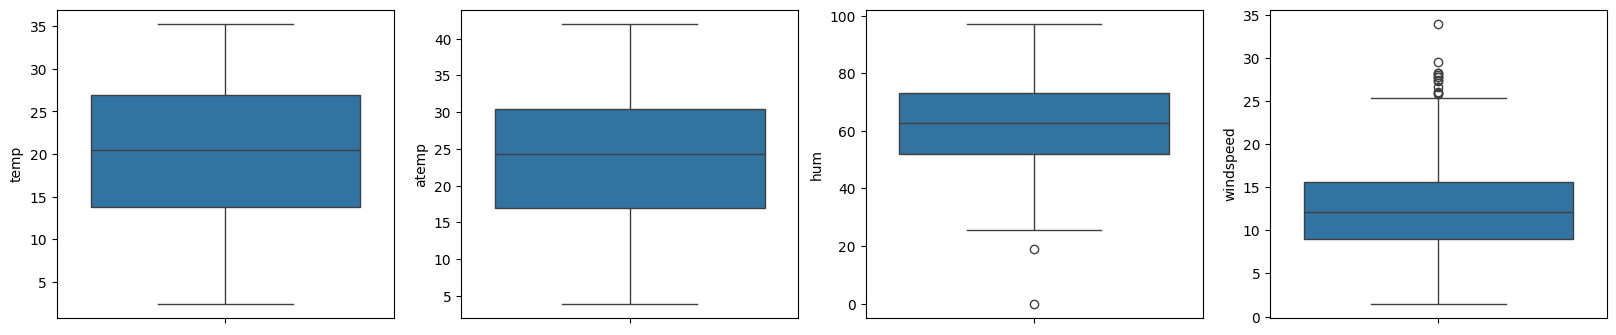

In [20]:
# Draw box plots for independent variables with continuous values
columns = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(20,4))

i = 1
for col in columns:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=Bikes_sharing)
    i+=1

<Figure size 1500x3000 with 0 Axes>

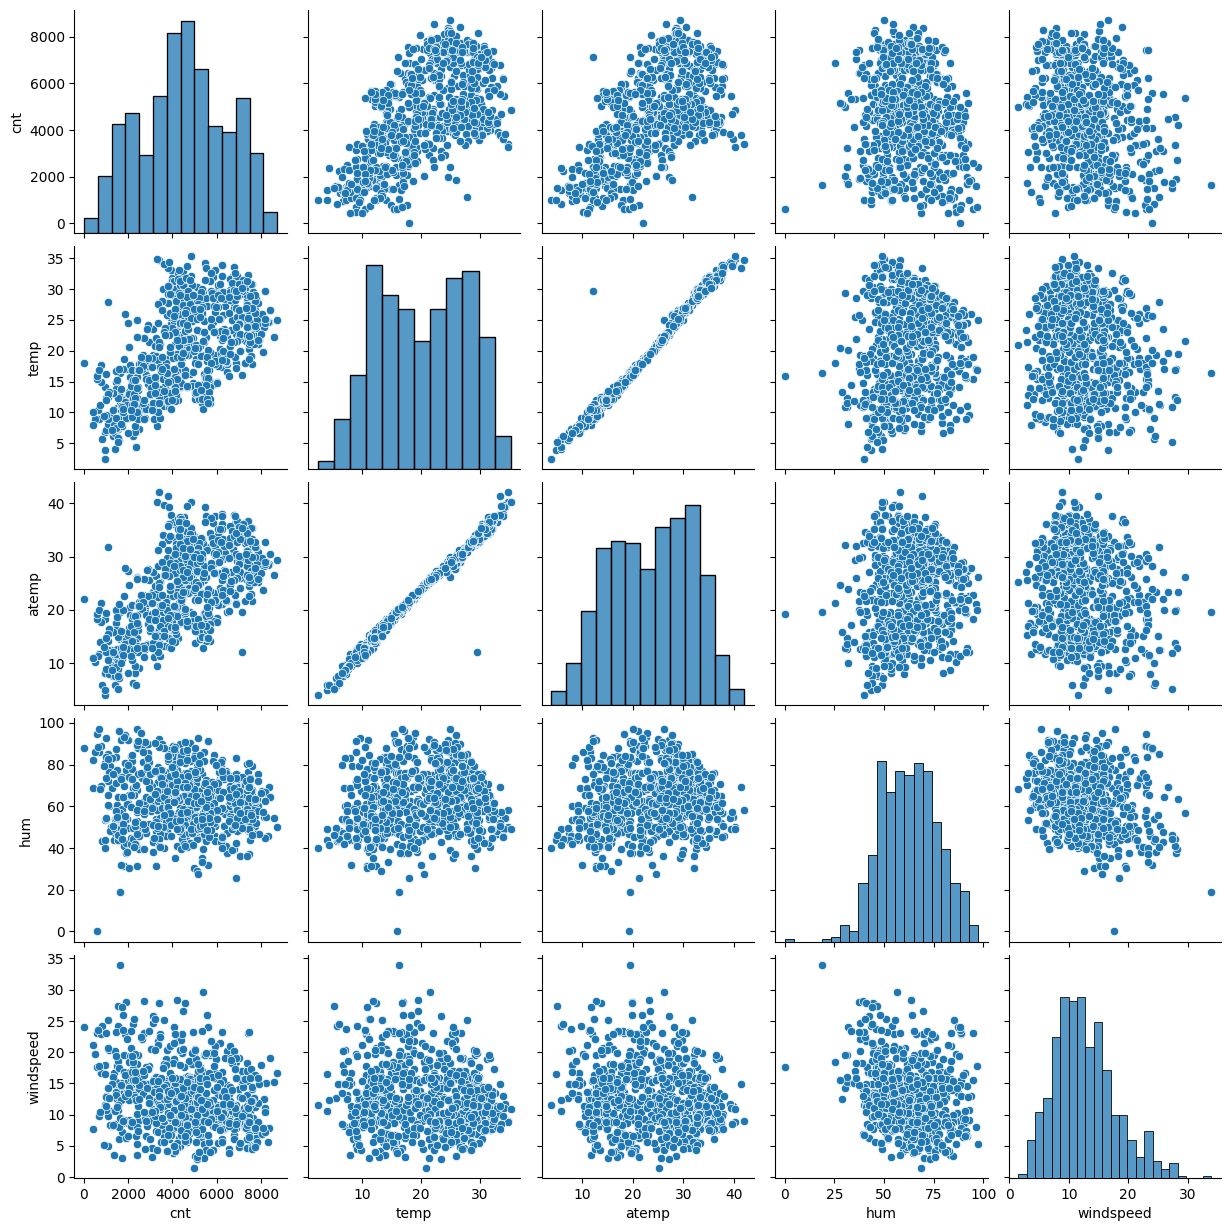

In [21]:
# Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
numerical_variables=['cnt', 'temp', 'atemp', 'hum','windspeed']
sns.pairplot(data=Bikes_sharing,vars=numerical_variables)
plt.show()

<Figure size 2000x1500 with 0 Axes>

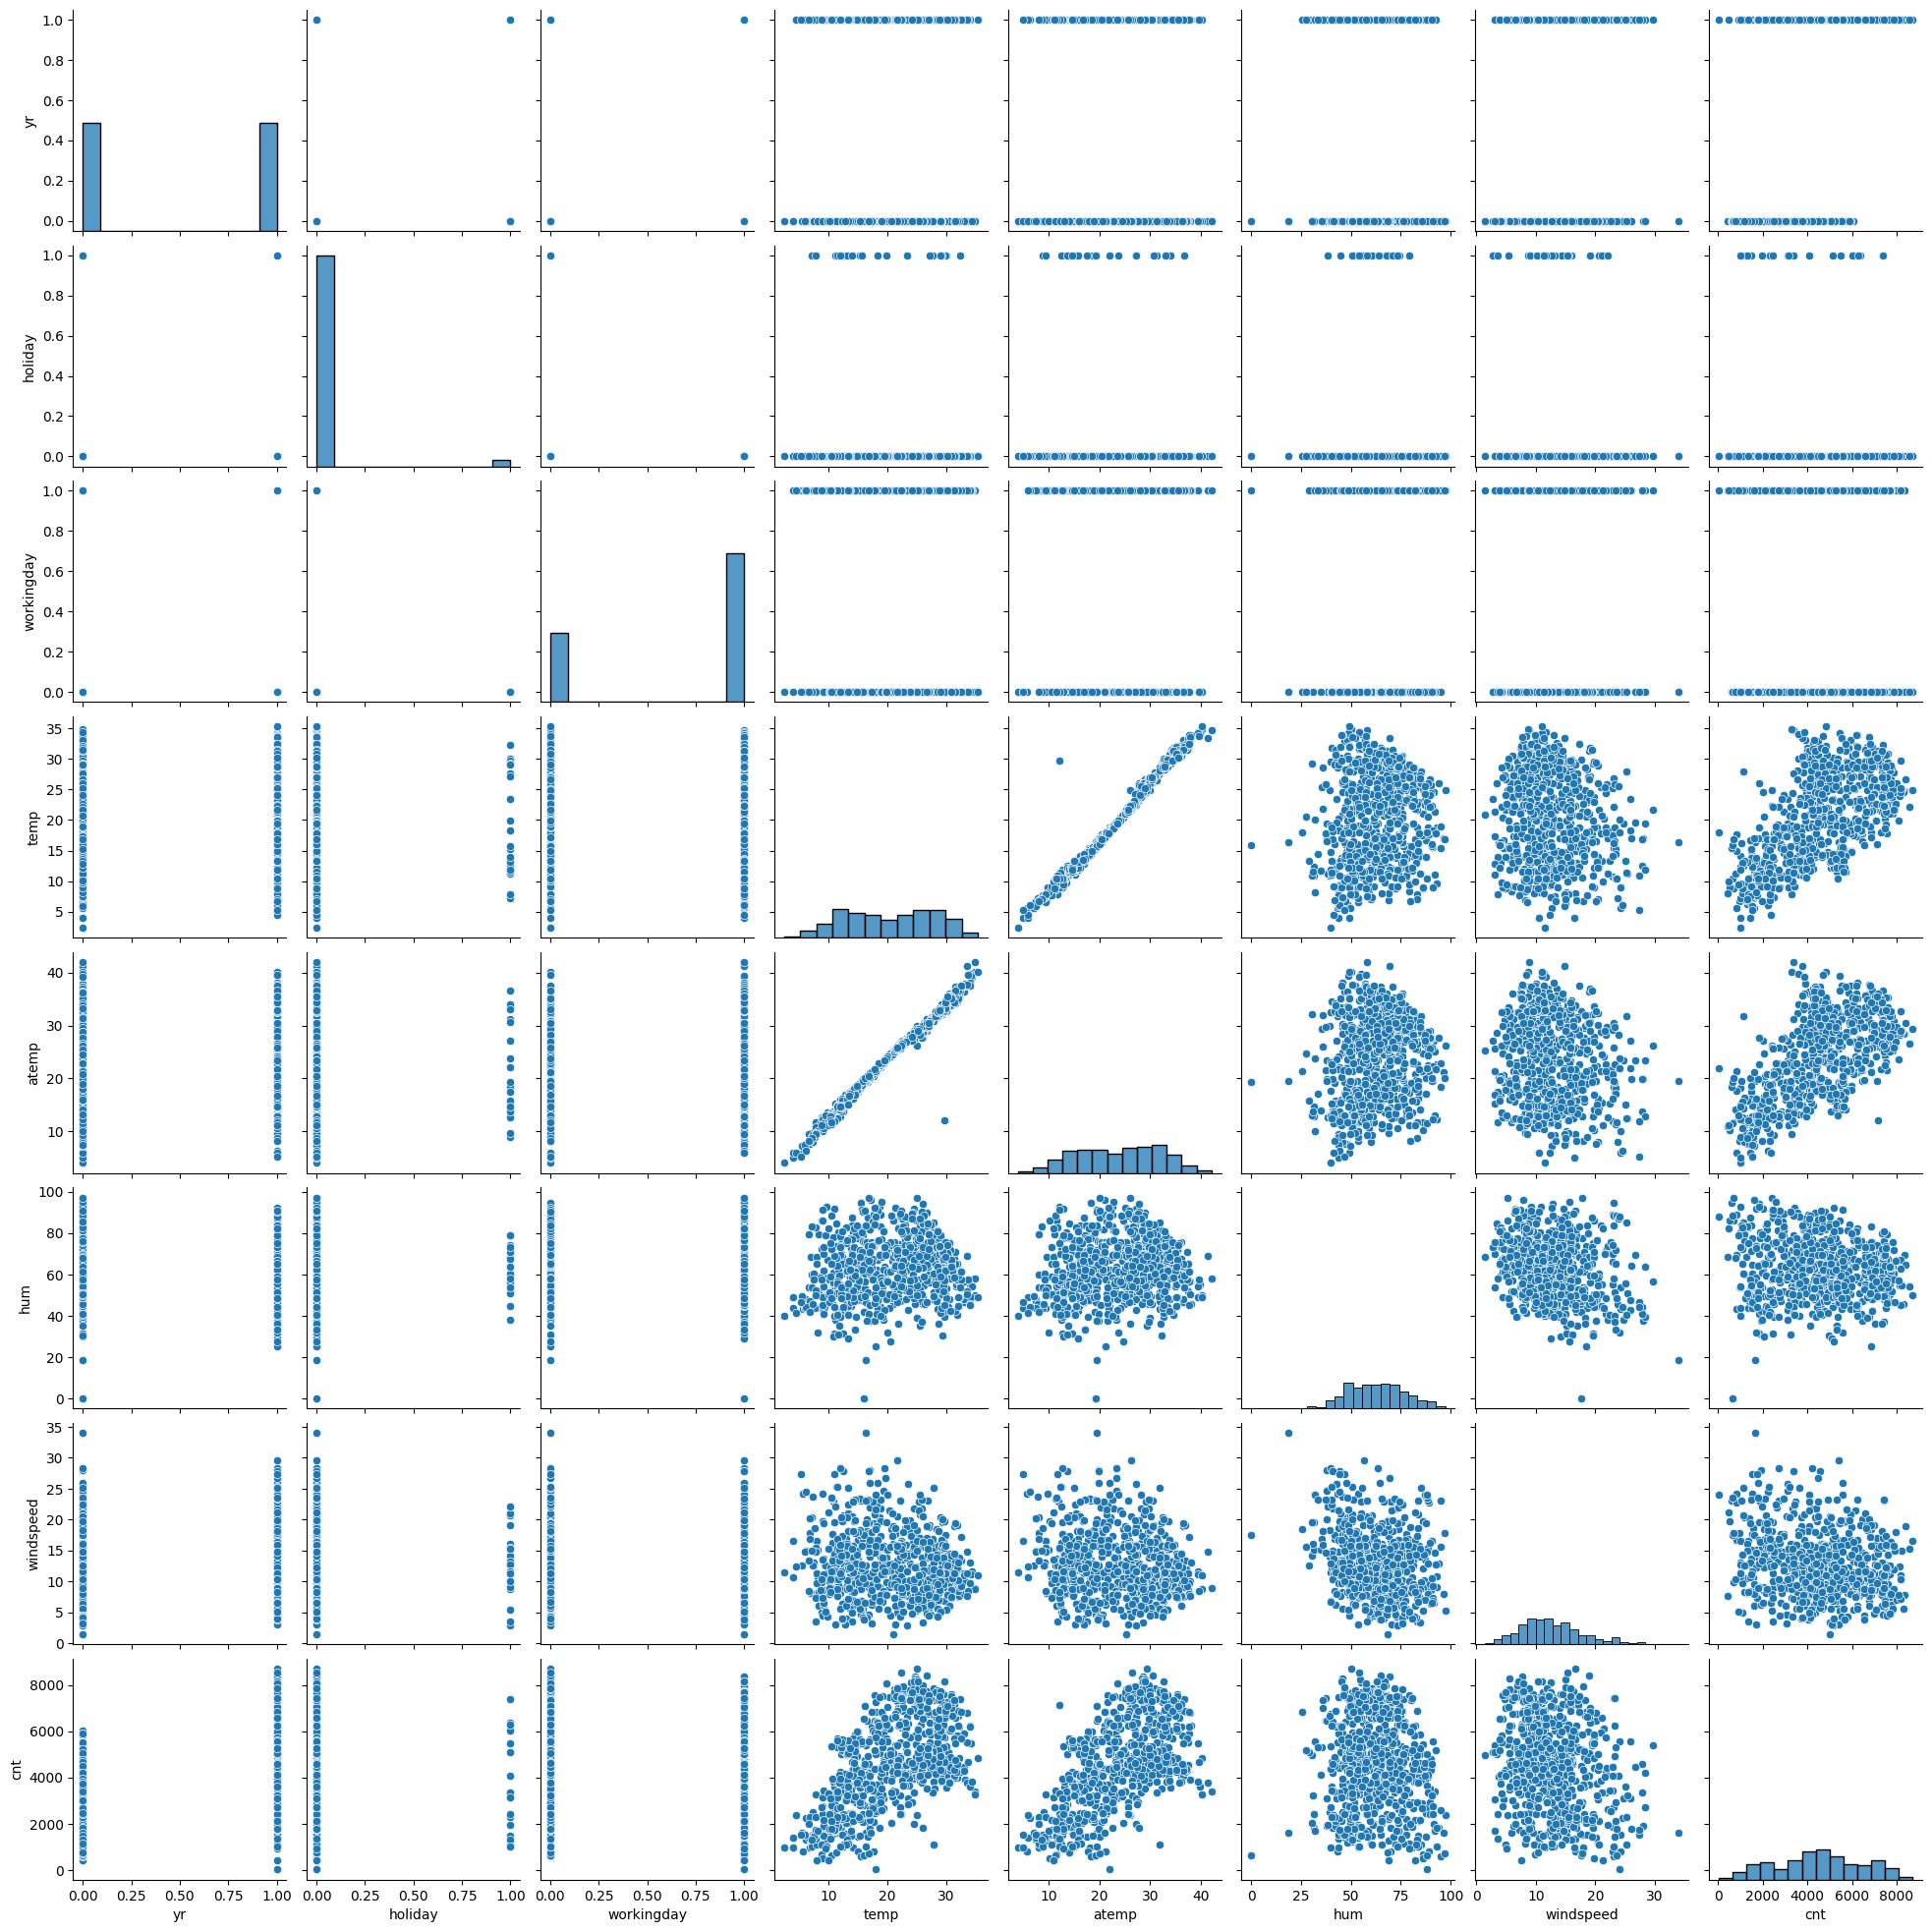

In [22]:
plt.figure(figsize=(20,15))
sns.pairplot(Bikes_sharing)
plt.show()

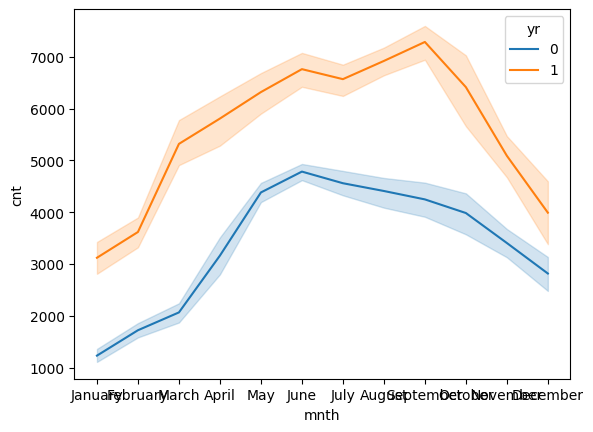

In [23]:
sns.lineplot(x = "mnth", y = "cnt", data=Bikes_sharing,hue = "yr")

plt.show() 

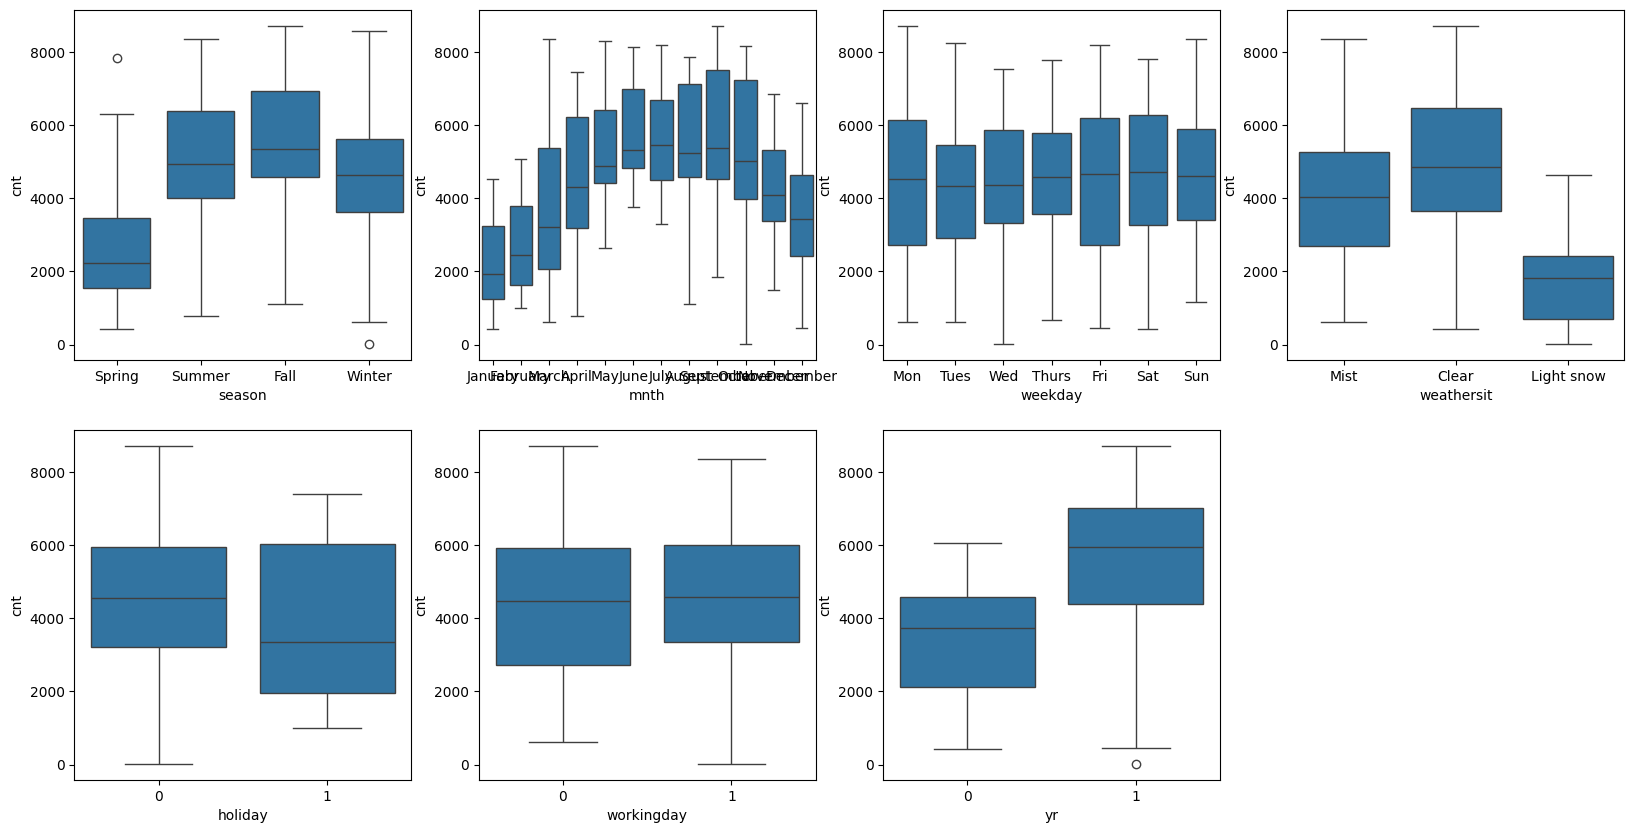

In [24]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 10))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bikes_sharing)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bikes_sharing)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bikes_sharing)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bikes_sharing)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bikes_sharing)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bikes_sharing)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = Bikes_sharing)
plt.show()

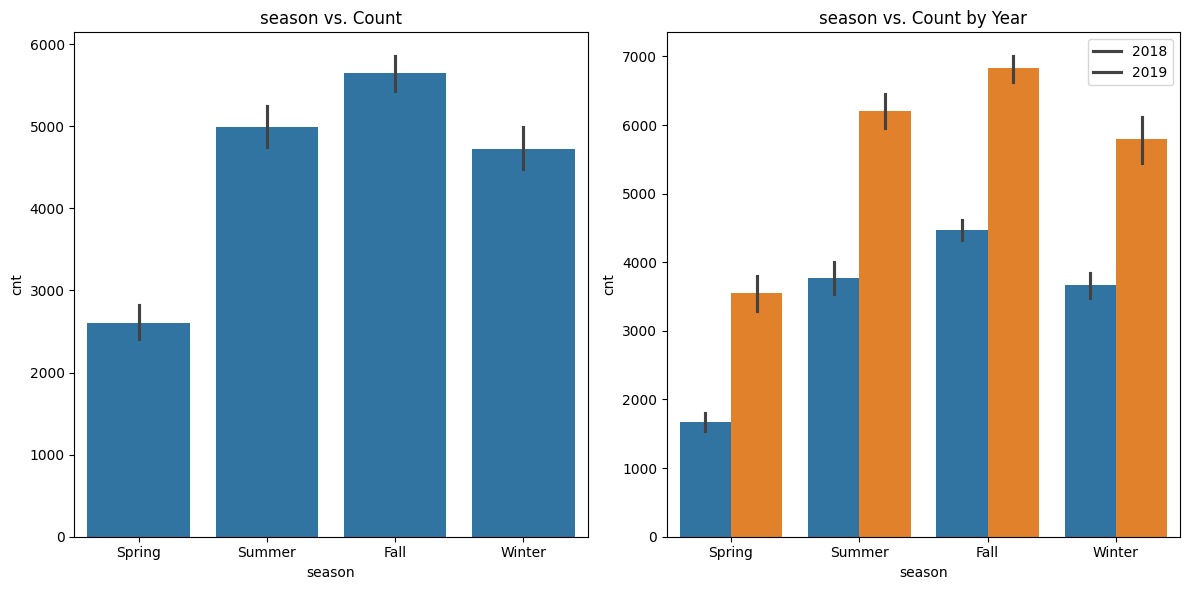

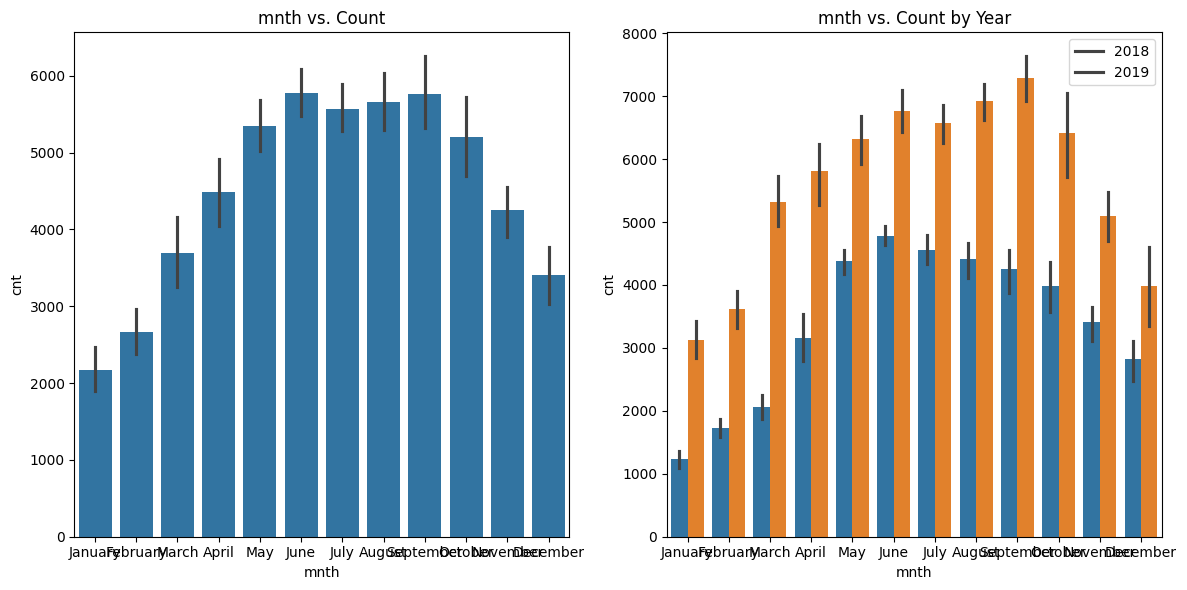

In [25]:
def plot_categorical_cols(column):
    plt.figure(figsize=(12, 6))

    # First subplot: Bar plot without hue
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=Bikes_sharing)
    plt.title(f'{column} vs. Count')

    # Second subplot: Bar plot with hue
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='cnt', data=Bikes_sharing,hue='yr')
    plt.legend(labels=['2018', '2019'])
    plt.title(f'{column} vs. Count by Year')
    
    plt.tight_layout()
    plt.show()

# Call the function with 'season' column
plot_categorical_cols('season')
plot_categorical_cols('mnth')

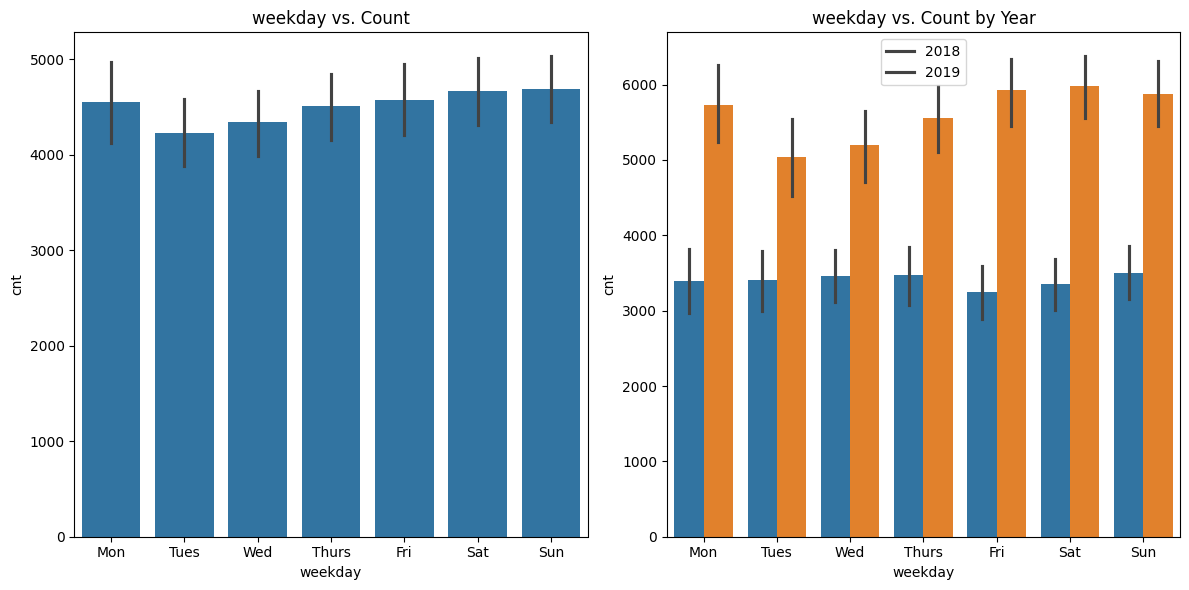

In [26]:
plot_categorical_cols('weekday')

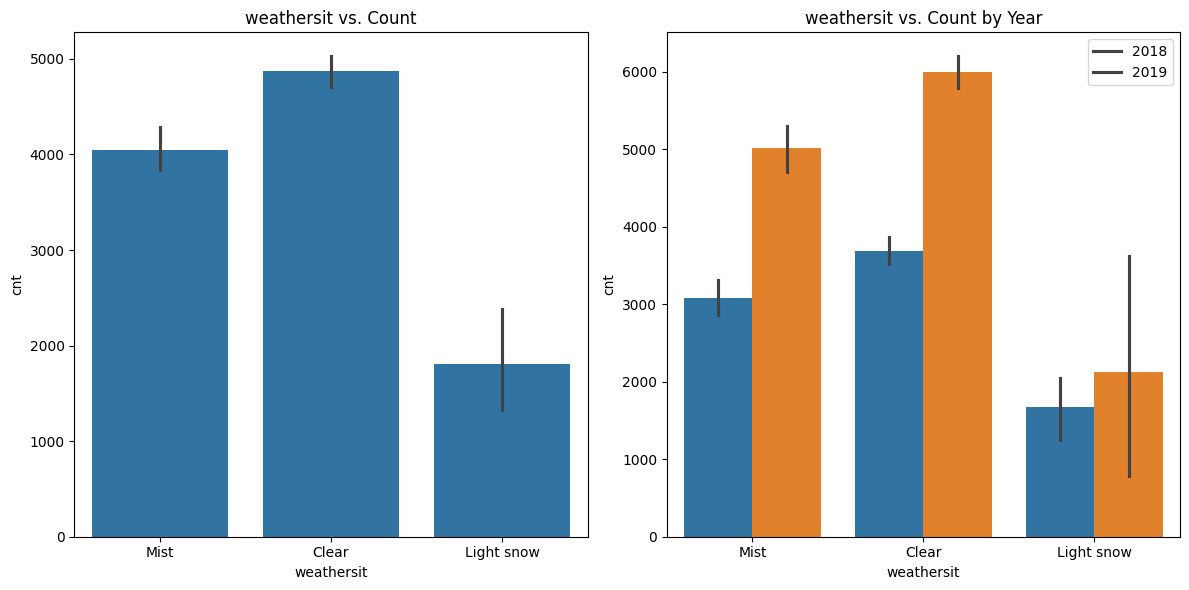

In [27]:
plot_categorical_cols('weathersit')

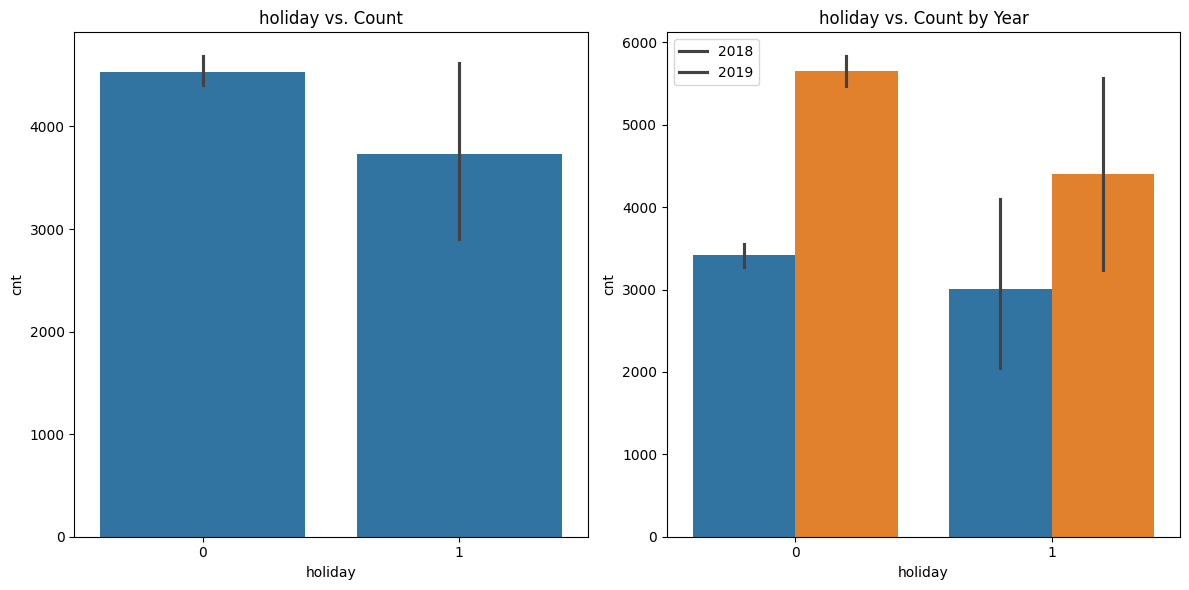

In [28]:
plot_categorical_cols('holiday')

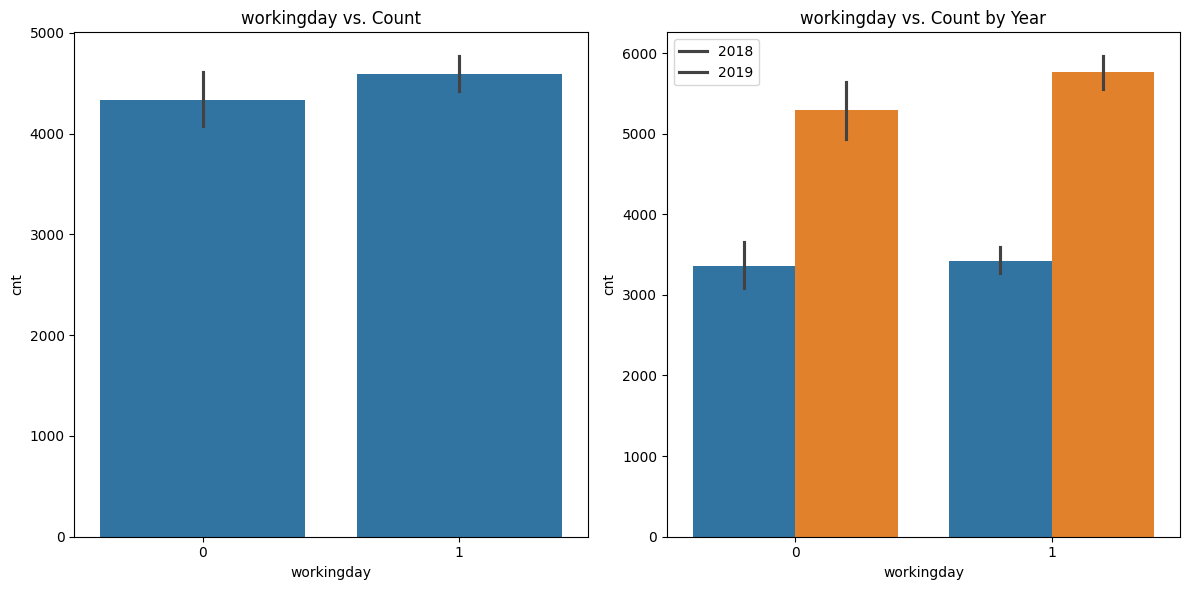

In [29]:
plot_categorical_cols('workingday')

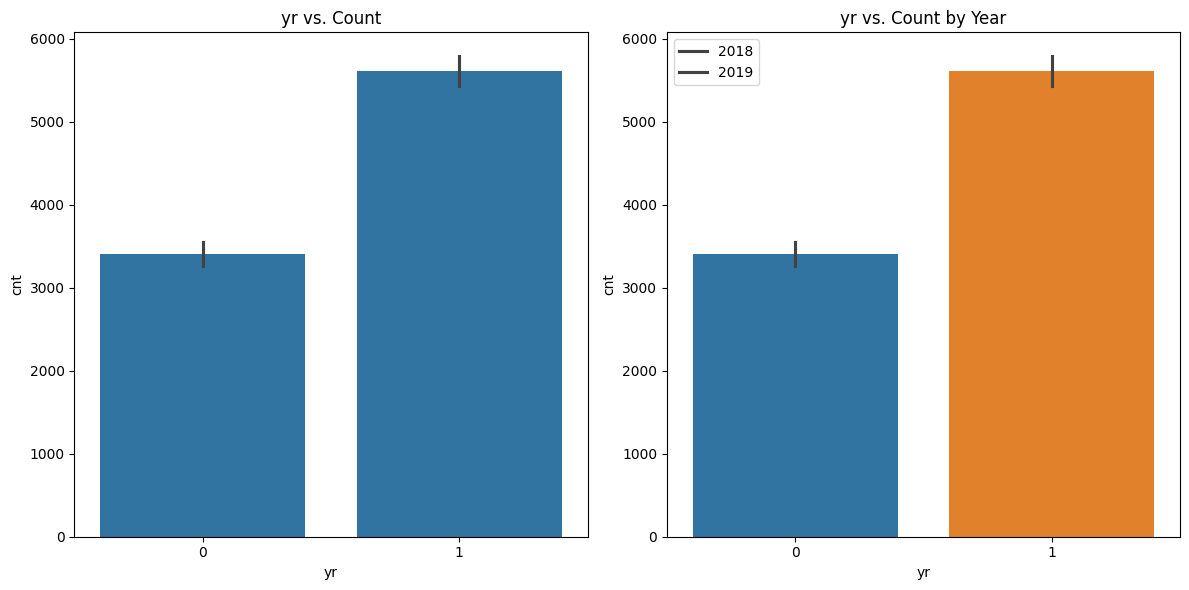

In [30]:
plot_categorical_cols('yr')

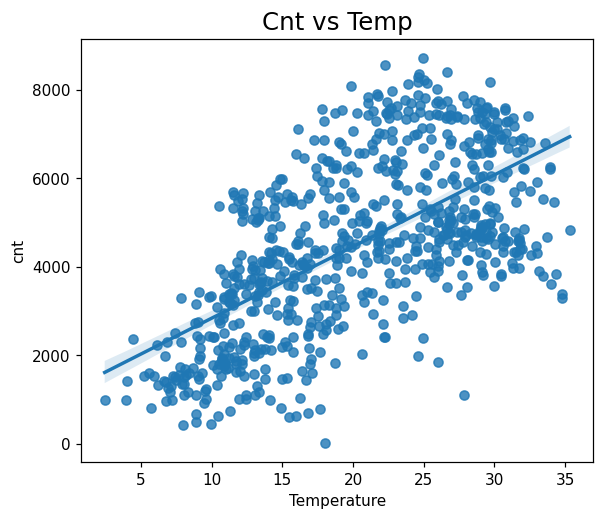

In [31]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=Bikes_sharing,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

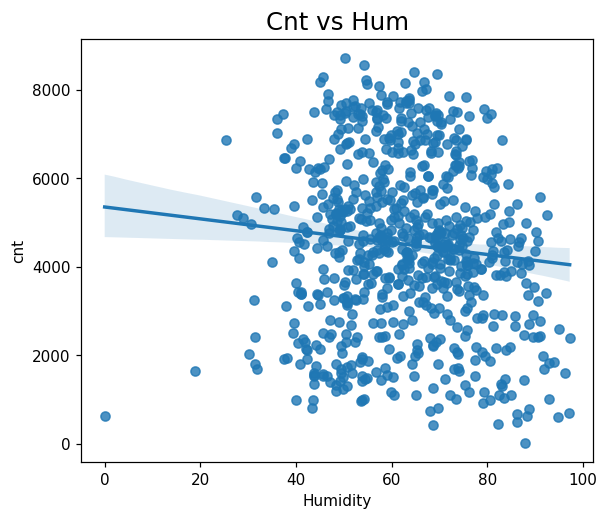

In [32]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=Bikes_sharing,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

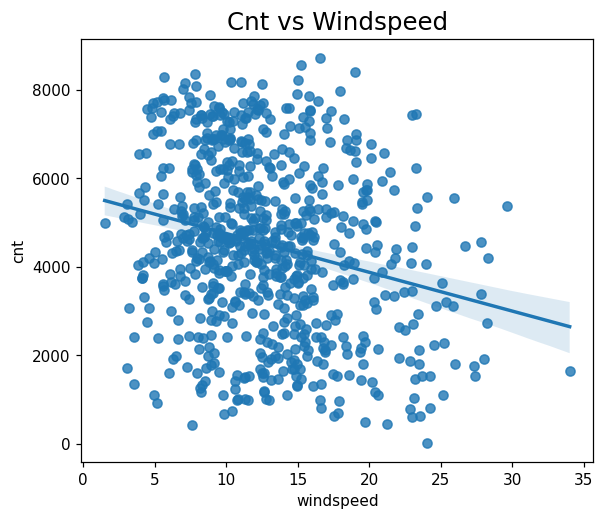

In [33]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=Bikes_sharing,y="cnt",x="windspeed")
plt.show()

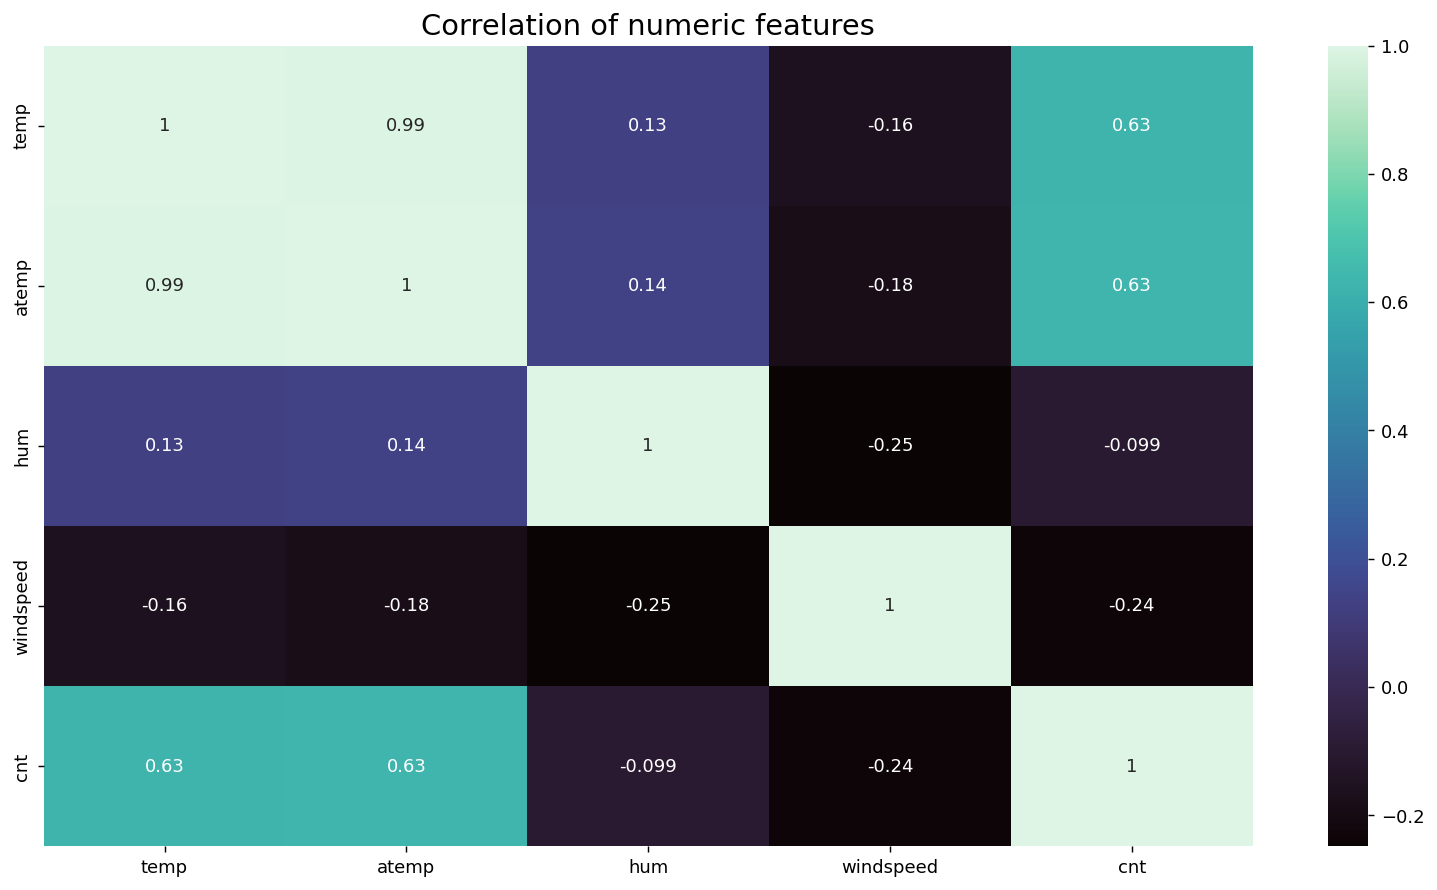

In [34]:
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(Bikes_sharing[num_features].corr(),annot= True,cmap="mako")
plt.show()

In [35]:
Bikes_sharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [36]:
Bikes_sharing.info

<bound method DataFrame.info of      season  yr      mnth  holiday weekday  workingday weathersit       temp  \
0    Spring   0   January        0     Mon           0       Mist  14.110847   
1    Spring   0   January        0    Tues           0       Mist  14.902598   
2    Spring   0   January        0     Wed           1      Clear   8.050924   
3    Spring   0   January        0   Thurs           1      Clear   8.200000   
4    Spring   0   January        0     Fri           1      Clear   9.305237   
..      ...  ..       ...      ...     ...         ...        ...        ...   
725  Spring   1  December        0     Sat           1       Mist  10.420847   
726  Spring   1  December        0     Sun           1       Mist  10.386653   
727  Spring   1  December        0     Mon           0       Mist  10.386653   
728  Spring   1  December        0    Tues           0      Clear  10.489153   
729  Spring   1  December        0     Wed           1       Mist   8.849153   

       

In [37]:
Bikes_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Mon,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Tues,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Step 3: Data Preparation

In [38]:
Bikes_sharing = pd.get_dummies(data=Bikes_sharing,columns=["season","mnth","weekday"],drop_first=True)
Bikes_sharing = pd.get_dummies(data=Bikes_sharing,columns=["weathersit"])

In [39]:
Bikes_sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_September,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Clear,weathersit_Light snow,weathersit_Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,True,False,False,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,False,False,True,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,False,False,False,False,True,True,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,True,False,False,True,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,False,True,False,False


In [40]:
Bikes_sharing.shape

(730, 31)

# Step 4 : Building the Model

In [41]:
#y contain target variable
for col in Bikes_sharing.select_dtypes(include=['bool']).columns:
    Bikes_sharing[col] = Bikes_sharing[col].astype(int)
Bikes_sharing = Bikes_sharing.apply(pd.to_numeric, errors='coerce')
y=Bikes_sharing.pop('cnt')

#X is all remainign variable also our independent variables
X=Bikes_sharing

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
print(X_train.shape)
print(X_test.shape)
Bikes_sharing.head()

(511, 30)
(219, 30)


,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_September,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Clear,weathersit_Light snow,weathersit_Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
# Scale continuous variables
numerical_vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[numerical_vars] = scaler.fit_transform(X_train[numerical_vars])

In [44]:
#Inspect from Training set after scaling
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_September,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Clear,weathersit_Light snow,weathersit_Mist
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,0.230920,0.258317,0.250489,...,0.09002,0.150685,0.146771,0.129159,0.131115,0.152642,0.148728,0.624266,0.029354,0.346380
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,0.421834,0.438138,0.433719,...,0.28649,0.358092,0.354224,0.335704,0.337857,0.359994,0.356169,0.484786,0.168963,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.000000,1.000000,0.500000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
#Inspect stats fro Training set after scaling
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 683 to 102
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     511 non-null    int64  
 1   holiday                511 non-null    int64  
 2   workingday             511 non-null    int64  
 3   temp                   511 non-null    float64
 4   atemp                  511 non-null    float64
 5   hum                    511 non-null    float64
 6   windspeed              511 non-null    float64
 7   season_Spring          511 non-null    int32  
 8   season_Summer          511 non-null    int32  
 9   season_Winter          511 non-null    int32  
 10  mnth_August            511 non-null    int32  
 11  mnth_December          511 non-null    int32  
 12  mnth_February          511 non-null    int32  
 13  mnth_January           511 non-null    int32  
 14  mnth_July              511 non-null    int32  
 15  mnth_June

In [46]:
# Build a Lienar Regression model using SKLearn for RFE

lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=15)
lr.fit(X_train,y_train)

LinearRegression()

In [47]:
#Cut down number of features to 15 using automated approach
#rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [48]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 10),
 ('season_Winter', False, 4),
 ('mnth_August', False, 13),
 ('mnth_December', False, 14),
 ('mnth_February', False, 5),
 ('mnth_January', False, 7),
 ('mnth_July', True, 1),
 ('mnth_June', False, 16),
 ('mnth_March', True, 1),
 ('mnth_May', False, 3),
 ('mnth_November', False, 8),
 ('mnth_October', True, 1),
 ('mnth_September', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 15),
 ('weekday_Sun', False, 12),
 ('weekday_Thurs', False, 9),
 ('weekday_Tues', False, 6),
 ('weekday_Wed', False, 11),
 ('weathersit_Clear', True, 1),
 ('weathersit_Light snow', True, 1),
 ('weathersit_Mist', False, 2)]

In [49]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'mnth_July', 'mnth_March', 'mnth_October',
       'mnth_September', 'weekday_Mon', 'weathersit_Clear',
       'weathersit_Light snow'],
      dtype='object')


In [50]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['season_Summer', 'season_Winter', 'mnth_August', 'mnth_December',
       'mnth_February', 'mnth_January', 'mnth_June', 'mnth_May',
       'mnth_November', 'weekday_Sat', 'weekday_Sun', 'weekday_Thurs',
       'weekday_Tues', 'weekday_Wed', 'weathersit_Mist'],
      dtype='object')

In [51]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'mnth_July', 'mnth_March', 'mnth_October',
       'mnth_September', 'weekday_Mon', 'weathersit_Clear',
       'weathersit_Light snow']]
X_train_rfe.shape

(511, 15)

In [52]:
X_train_rfe.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,mnth_July,mnth_March,mnth_October,mnth_September,weekday_Mon,weathersit_Clear,weathersit_Light snow
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0,0,0,0,0,0,0,0
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,0,1,0,0,0,0
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0,0,0,0,0,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,1,0,0,0,0,0,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,0,1,0,0,0,0


In [53]:
cols= ['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'mnth_July', 'mnth_March', 'mnth_October',
       'mnth_September', 'weekday_Mon', 'weathersit_Clear',
       'weathersit_Light snow']

In [54]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [55]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [56]:

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.3
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          6.32e-187
Time:                        18:23:02   Log-Likelihood:                -4121.9
No. Observations:                 511   AIC:                             8276.
Df Residuals:                     495   BIC:                             8344.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2618.91

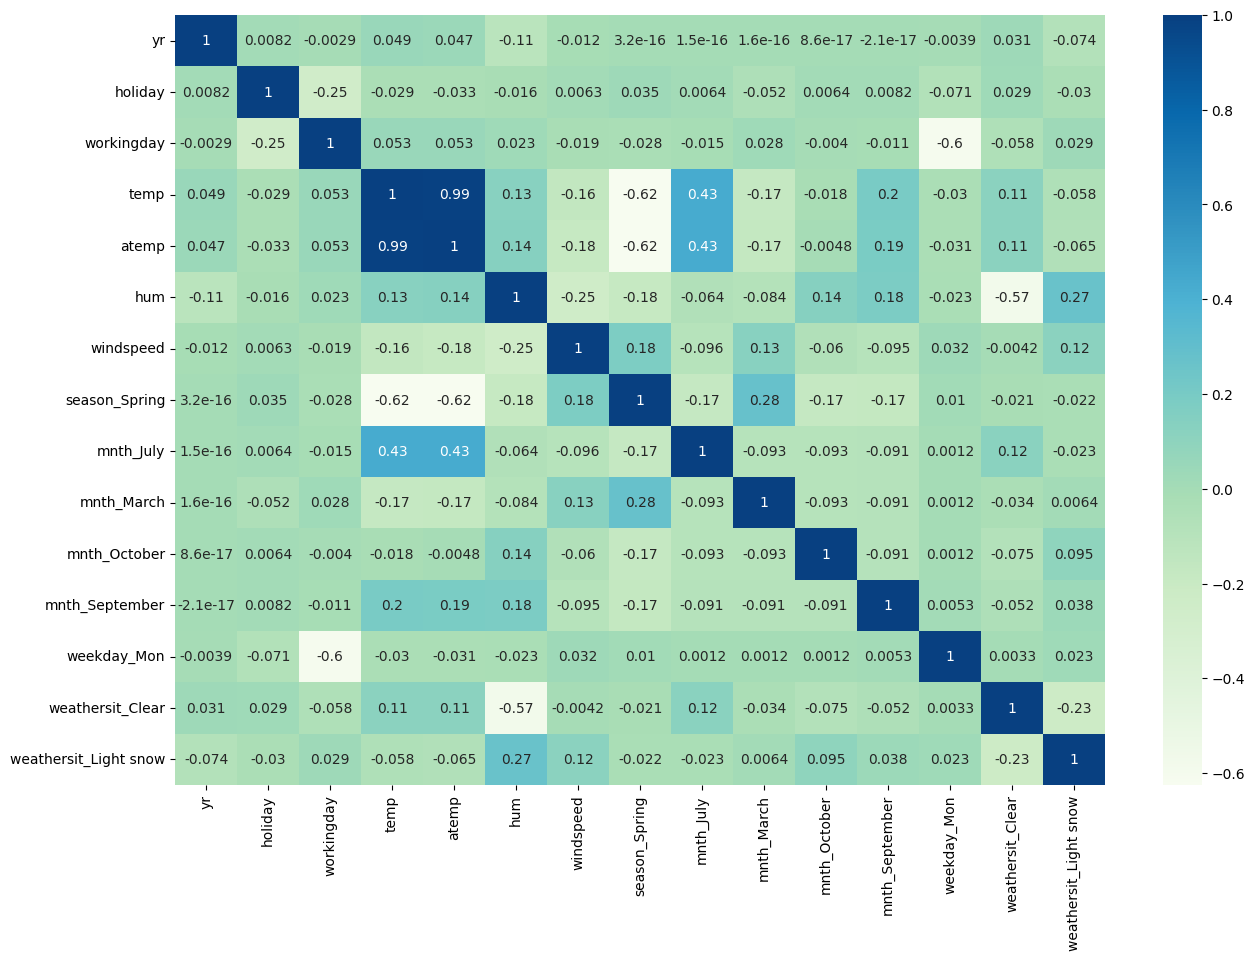

In [57]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(Bikes_sharing[['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'mnth_July', 'mnth_March', 'mnth_October',
       'mnth_September', 'weekday_Mon', 'weathersit_Clear',
       'weathersit_Light snow']].corr(), cmap='GnBu', annot=True)
plt.show()

In [58]:
col = col.drop(['hum'])

In [59]:
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.7
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.99e-184
Time:                        18:23:03   Log-Likelihood:                -4130.6
No. Observations:                 511   AIC:                             8291.
Df Residuals:                     496   BIC:                             8355.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1554.04

In [60]:
# Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'atemp', 'windspeed',
       'season_Spring', 'mnth_July', 'mnth_March', 'mnth_October',
       'mnth_September', 'weekday_Mon', 'weathersit_Clear',
       'weathersit_Light snow']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.7
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          5.61e-185
Time:                        18:23:04   Log-Likelihood:                -4132.0
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     497   BIC:                             8351.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1485.59

In [61]:
# Dropping the variable mnth_July as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'atemp', 'windspeed',
       'season_Spring', 'mnth_March', 'mnth_October',
       'mnth_September', 'weekday_Mon', 'weathersit_Clear',
       'weathersit_Light snow']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.6
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.47e-184
Time:                        18:23:04   Log-Likelihood:                -4135.8
No. Observations:                 511   AIC:                             8298.
Df Residuals:                     498   BIC:                             8353.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1581.47

In [62]:
# Dropping the variable temp as it has high VIF
cols = ['yr', 'workingday', 'atemp', 'windspeed',
       'season_Spring', 'mnth_March', 'mnth_October',
       'mnth_September', 'weekday_Mon', 'weathersit_Clear',
       'weathersit_Light snow']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.7
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.06e-185
Time:                        18:23:04   Log-Likelihood:                -4135.9
No. Observations:                 511   AIC:                             8296.
Df Residuals:                     499   BIC:                             8347.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1556.48

In [63]:
# Dropping the variable atemp as it has high VIF
cols = ['yr', 'workingday', 'windspeed',
       'season_Spring', 'mnth_March', 'mnth_October',
       'mnth_September', 'weekday_Mon', 'weathersit_Clear',
       'weathersit_Light snow']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     164.4
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          4.81e-151
Time:                        18:23:04   Log-Likelihood:                -4220.6
No. Observations:                 511   AIC:                             8463.
Df Residuals:                     500   BIC:                             8510.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3467.19

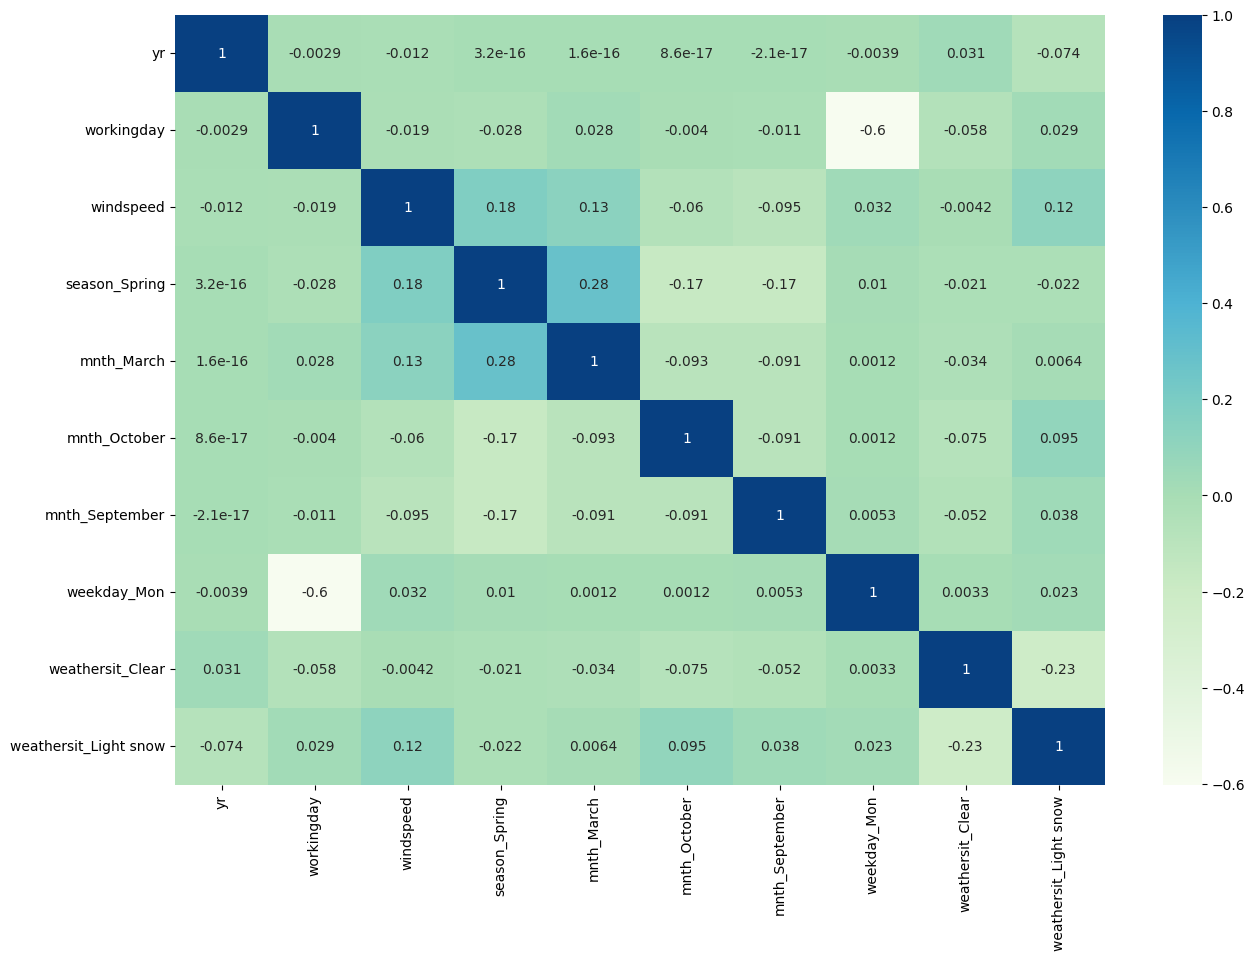

In [64]:
plt.figure(figsize = (15,10))
sns.heatmap(Bikes_sharing[['yr', 'workingday', 'windspeed',
       'season_Spring', 'mnth_March', 'mnth_October',
       'mnth_September', 'weekday_Mon', 'weathersit_Clear',
       'weathersit_Light snow']].corr(), cmap='GnBu', annot=True)
plt.show()

In [65]:
# bringing the variable temp back 
cols = ['yr', 'workingday', 'temp', 'windspeed',
       'season_Spring', 'mnth_March', 'mnth_October',
       'mnth_September', 'weekday_Mon', 'weathersit_Clear',
       'weathersit_Light snow']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.3
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.56e-185
Time:                        18:23:05   Log-Likelihood:                -4136.3
No. Observations:                 511   AIC:                             8297.
Df Residuals:                     499   BIC:                             8347.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1648.99

In [66]:
# Remove the variable working day 
cols = ['yr', 'temp', 'windspeed',
       'season_Spring', 'mnth_March', 'mnth_October',
       'mnth_September', 'weekday_Mon', 'weathersit_Clear',
       'weathersit_Light snow']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     237.0
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.54e-182
Time:                        18:23:05   Log-Likelihood:                -4146.2
No. Observations:                 511   AIC:                             8314.
Df Residuals:                     500   BIC:                             8361.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1969.44

In [67]:
# Remove the variable weekday_mon
cols = ['yr', 'temp', 'windspeed',
       'season_Spring', 'mnth_March', 'mnth_October',
       'mnth_September', 'weathersit_Clear',
       'weathersit_Light snow']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     262.8
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.95e-183
Time:                        18:23:05   Log-Likelihood:                -4147.0
No. Observations:                 511   AIC:                             8314.
Df Residuals:                     501   BIC:                             8356.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1992.38

In [68]:
# Remove the variable weekday_mon
cols = ['yr', 'temp', 'windspeed',
       'season_Spring', 'mnth_March', 'mnth_October',
       'mnth_September', 'weathersit_Clear',
       'weathersit_Light snow','weekday_Sun']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.0
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          6.38e-183
Time:                        18:23:05   Log-Likelihood:                -4145.3
No. Observations:                 511   AIC:                             8313.
Df Residuals:                     500   BIC:                             8359.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1963.70

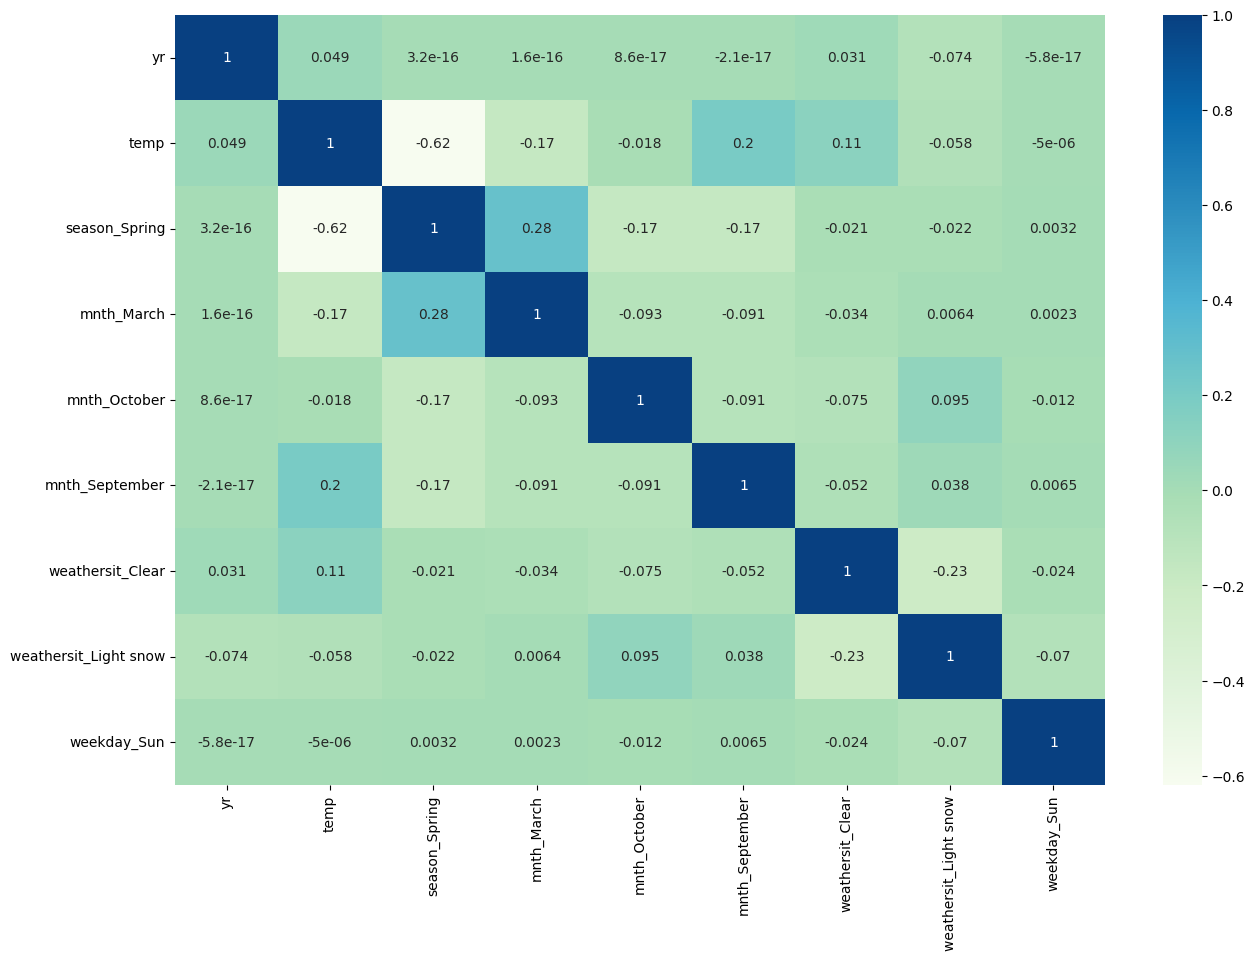

In [69]:
plt.figure(figsize = (15,10))
sns.heatmap(Bikes_sharing[['yr', 'temp',
       'season_Spring', 'mnth_March', 'mnth_October',
       'mnth_September', 'weathersit_Clear',
       'weathersit_Light snow','weekday_Sun']].corr(), cmap='GnBu', annot=True)
plt.show()

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
df_selected = Bikes_sharing[['yr', 'temp', 'windspeed', 'season_Spring', 'mnth_March', 'mnth_October',
                   'mnth_September', 'weathersit_Clear', 'weathersit_Light snow', 'weekday_Sun']]

# Add a constant column to the DataFrame
df_with_const = add_constant(df_selected)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

print(vif_data)

                  Feature        VIF
0                   const  26.710054
1                      yr   1.008973
2                    temp   1.726875
3               windspeed   1.066808
4           season_Spring   1.826188
5              mnth_March   1.099310
6            mnth_October   1.088857
7          mnth_September   1.073420
8        weathersit_Clear   1.079706
9   weathersit_Light snow   1.094638
10            weekday_Sun   1.006944


In [71]:
# Remove the variable weekday_mon
cols = ['yr', 'temp',
       'season_Spring', 'mnth_March', 'mnth_October',
       'mnth_September', 'weathersit_Clear',
       'weathersit_Light snow','weekday_Sun']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.0
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          4.33e-181
Time:                        18:23:06   Log-Likelihood:                -4152.5
No. Observations:                 511   AIC:                             8325.
Df Residuals:                     501   BIC:                             8367.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1604.90

In [72]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [73]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'temp',
       'season_Spring', 'mnth_March', 'mnth_October',
       'mnth_September', 'weathersit_Clear',
       'weathersit_Light snow','weekday_Sun']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1604.9020228232712 [ 1985.96594082  3067.95983104 -1538.88591135   555.80391059
   814.57147766   707.59137804   689.68293873 -1702.01335459
   210.15515563]


# Step 5: Residual Analysis on the training data and model validation.

In [74]:
# 1.Predicting the Y_train value(Count) using the model

y_train_pred = lr.predict(X_train[cols])

In [75]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

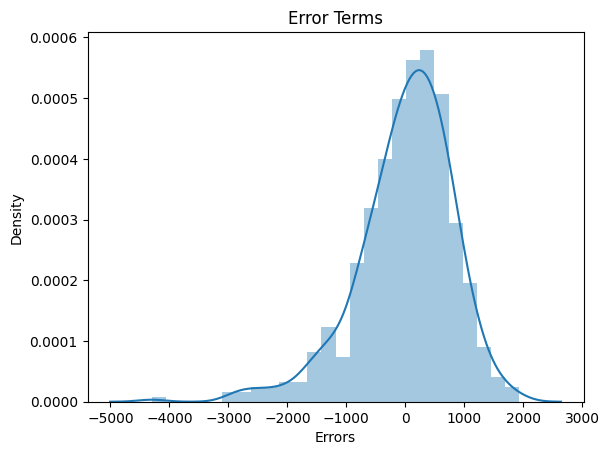

In [76]:
plot_res_dist(y_train, y_train_pred)

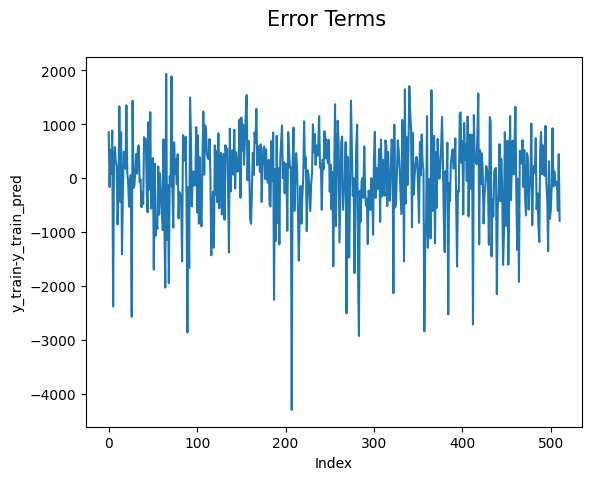

In [77]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

In [78]:
#Print R-squared Value
from sklearn.metrics import r2_score
r2_score(y_train,y_train_pred)

0.8214097420360953

In [79]:
# Number of observations
n = X_train.shape[0]

# Number of predictors
k = len(cols)

# Calculate r2
r2=r2_score(y_train,y_train_pred)
# Calculate Adjusted R-squared
r2_adj = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Print R-squared and Adjusted R-squared
print(f'R-squared value: {r2}')
print(f'Adjusted R-squared value: {r2_adj}')

R-squared value: 0.8214097420360953
Adjusted R-squared value: 0.8182015338091988


##  Linearity Check

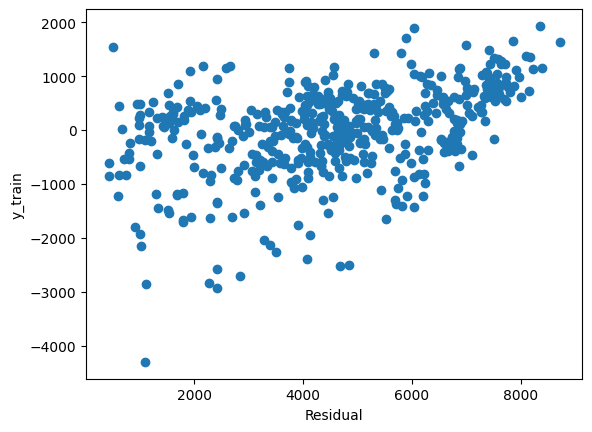

In [80]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

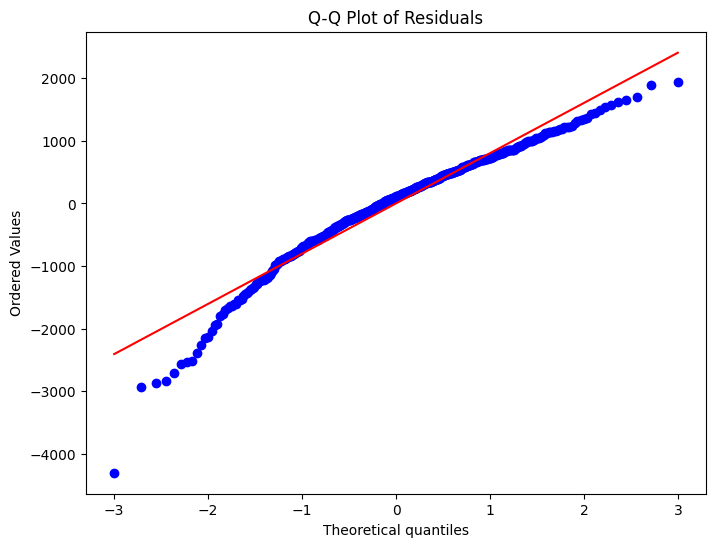

In [81]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Calculate residuals
residual = y_train - y_train_pred

# Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residual, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

#### Predict values for test data set

In [82]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [83]:
#Columns from our final model
cols = ['yr', 'temp',
       'season_Spring', 'mnth_March', 'mnth_October',
       'mnth_September', 'weathersit_Clear',
       'weathersit_Light snow','weekday_Sun']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

In [84]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.7971601531713057

In [85]:
# Number of observations
n = X_train.shape[0]

# Number of predictors
k = len(cols)

# Calculate r2
r2=r2_score(y_test,y_test_pred)
# Calculate Adjusted R-squared
r2_adj = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Print R-squared and Adjusted R-squared
print(f'R-squared value: {r2}')
print(f'Adjusted R-squared value: {r2_adj}')

R-squared value: 0.7971601531713057
Adjusted R-squared value: 0.7935163235875567


#### Inference
R2 value for predictions on test data (0.815) is almost same as R2 value of train data(0.818). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

Text(0, 0.5, 'y_test_pred')

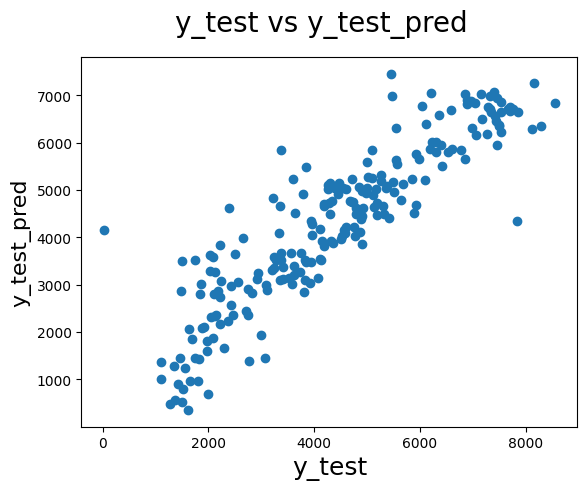

In [86]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

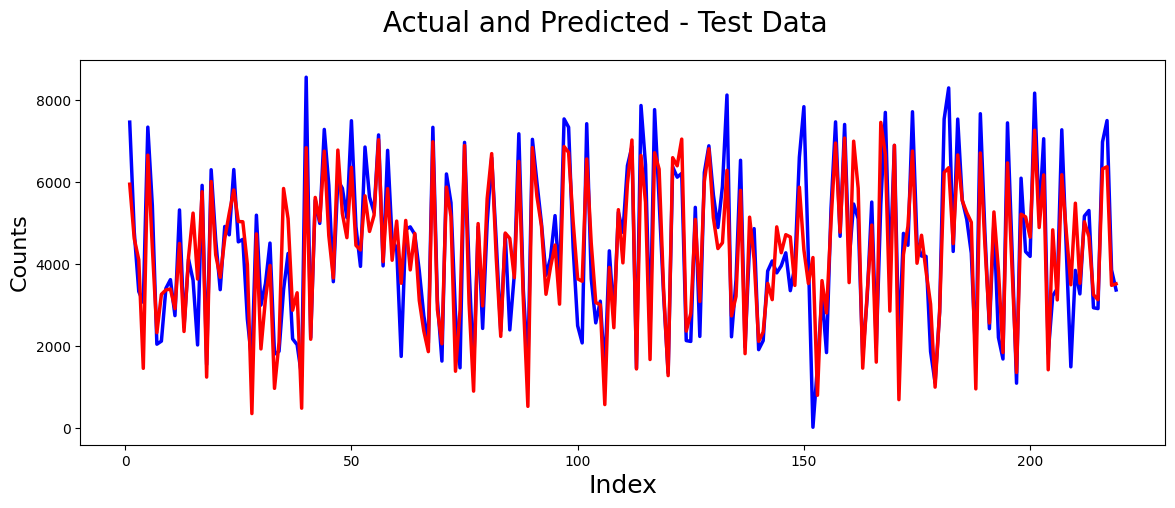

In [87]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)   
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

# Conclusion

Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.8214097420360953
- Test dataset R^2           : 0.7971601531713057
- Train dataset Adjusted R^2 : 0.8182015338091988   
- Test dataset Adjusted R^2  : 0.7935163235875567

# Recommendations


Leverage High-Impact Features: Focus on features such as temp, yr as they exhibit the highest coefficient values, indicating significant impact on bike demand.

Seasonal Strategies: Develop targeted marketing and pricing strategies for different seasons, particularly emphasizing promotions during Summer aFallter.

Optimize Operational Planning: Adjust bike availability and distribution based on the significant features identified, optimizing resources for peak demand periods.

User Engagement on Weekends: Capitalize on increased demand on Sunday by introducing special promotions or events to encourage bike usage during weekends.

Weather-Sensitive Promotions: Implement weather-specific promotions or incentives to encourage bike usage during favorable weather conditions, addressing the impact of temp, hum, and windspeed.

New Market Insights: Use the developed model to gain insights into demand dyname American market, informing business strategies and positioning BoomBikes competitively.

Continuous Monitoring and Adaptation: Regularly update the model with new data and adapt strategies based on evolving market conditions to ensure sustained revenue growth.